In [1]:
pip install folium

   ---------------------------------------- 0.0/108.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/108.4 kB ? eta -:--:--
   --- ------------------------------------ 10.2/108.4 kB ? eta -:--:--
   --- ------------------------------------ 10.2/108.4 kB ? eta -:--:--
   ----------- --------------------------- 30.7/108.4 kB 187.9 kB/s eta 0:00:01
   ----------------------------- --------- 81.9/108.4 kB 383.3 kB/s eta 0:00:01
   ----------------------------------- -- 102.4/108.4 kB 393.8 kB/s eta 0:00:01
   -------------------------------------- 108.4/108.4 kB 392.7 kB/s eta 0:00:00
   ---------------------------------------- 0.0/85.1 kB ? eta -:--:--
   ---------------------------------------- 0.0/85.1 kB ? eta -:--:--
   ---------------------------------------- 0.0/85.1 kB ? eta -:--:--
   ---------------------------------------- 0.0/85.1 kB ? eta -:--:--
   -------------- ------------------------- 30.7/85.1 kB 1.4 MB/s eta 0:00:01
   ---------------------------- ----


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install mysql-connector-python geopandas

  Using cached mysql_connector_python-9.0.0-cp311-cp311-win_amd64.whl.metadata (2.0 kB)
  Using cached geopandas-1.0.1-py3-none-any.whl.metadata (2.2 kB)
  Using cached pyogrio-0.10.0-cp311-cp311-win_amd64.whl.metadata (5.6 kB)
  Using cached pyproj-3.7.0-cp311-cp311-win_amd64.whl.metadata (31 kB)
  Using cached shapely-2.0.6-cp311-cp311-win_amd64.whl.metadata (7.2 kB)
Using cached mysql_connector_python-9.0.0-cp311-cp311-win_amd64.whl (14.3 MB)
Using cached geopandas-1.0.1-py3-none-any.whl (323 kB)
   ---------------------------------------- 0.0/16.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/16.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/16.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/16.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/16.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/16.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/16.2 MB ? eta -:--:--
   --


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



   -------------------- ------------------- 3.2/6.2 MB 402.7 kB/s eta 0:00:08
   -------------------- ------------------- 3.2/6.2 MB 402.1 kB/s eta 0:00:08
   -------------------- ------------------- 3.3/6.2 MB 400.3 kB/s eta 0:00:08
   --------------------- ------------------ 3.3/6.2 MB 401.3 kB/s eta 0:00:08
   --------------------- ------------------ 3.3/6.2 MB 401.0 kB/s eta 0:00:08
   --------------------- ------------------ 3.3/6.2 MB 399.7 kB/s eta 0:00:08
   --------------------- ------------------ 3.3/6.2 MB 399.7 kB/s eta 0:00:08
   --------------------- ------------------ 3.3/6.2 MB 399.2 kB/s eta 0:00:08
   --------------------- ------------------ 3.3/6.2 MB 396.7 kB/s eta 0:00:08
   --------------------- ------------------ 3.3/6.2 MB 396.7 kB/s eta 0:00:08
   --------------------- ------------------ 3.3/6.2 MB 396.7 kB/s eta 0:00:08
   --------------------- ------------------ 3.3/6.2 MB 396.7 kB/s eta 0:00:08
   --------------------- ------------------ 3.3/6.2 MB 396.7 kB

In [1]:
import pandas as pd
import mysql.connector
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [9]:
# Connect to MySQL database
conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="likhith",
    database="crimedata"
)

# Query the dataset
query = "SELECT * FROM crime_data"
df = pd.read_sql(query, conn)

C:\Users\Pandu\AppData\Local\Temp\ipykernel_14768\845345220.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


In [10]:
df.head()

,Incident Type,Location,Timestamp,Age,Gender,Weapon Used,Crime Scene Location
0,Assault,Vancouver,2021-08-15 10:40:02,32,Other,Gun,Private
1,Burglary,Toronto,2022-04-04 04:48:03,39,Other,Gun,Public
2,Assault,Vancouver,2023-08-21 23:15:11,68,Male,Unknown,Private
3,Burglary,Chicago,2022-08-15 15:07:41,55,Female,Gun,Private
4,Fraud,Houston,2024-09-14 08:04:33,51,Male,Bat,Public


In [11]:
df.isnull().sum()

Incident Type           0
Location                0
Timestamp               0
Age                     0
Gender                  0
Weapon Used             0
Crime Scene Location    0
dtype: int64

In [13]:
# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Fill or drop missing values based on relevance
df = df.dropna()  # Optionally fill with mean or median values based on context

# Remove duplicate rows, if any
df = df.drop_duplicates()

# Verify data types
print("Data types:\n", df.dtypes)

Missing values:
 Incident Type           0
Location                0
Timestamp               0
Age                     0
Gender                  0
Weapon Used             0
Crime Scene Location    0
dtype: int64
Data types:
 Incident Type           object
Location                object
Timestamp               object
Age                      int64
Gender                  object
Weapon Used             object
Crime Scene Location    object
dtype: object


                           Timestamp          Age
count                           1000  1000.000000
mean   2021-11-21 23:27:43.592999936    43.184000
min              2019-01-03 00:52:27    18.000000
25%              2020-06-15 08:27:30    30.000000
50%       2021-11-16 05:09:58.500000    42.000000
75%       2023-05-05 19:24:16.500000    56.000000
max              2024-10-09 20:37:06    70.000000
std                              NaN    15.379293


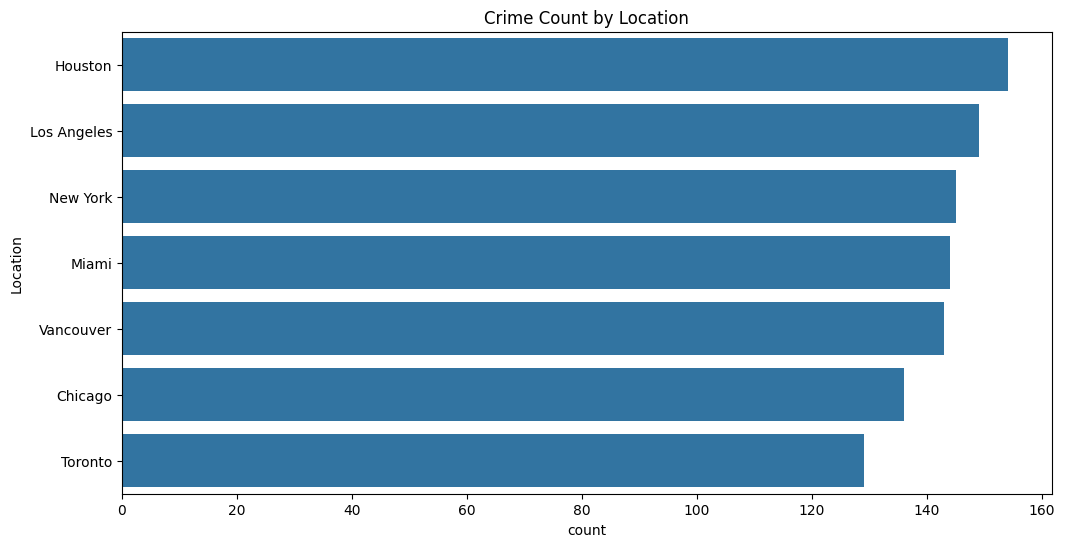

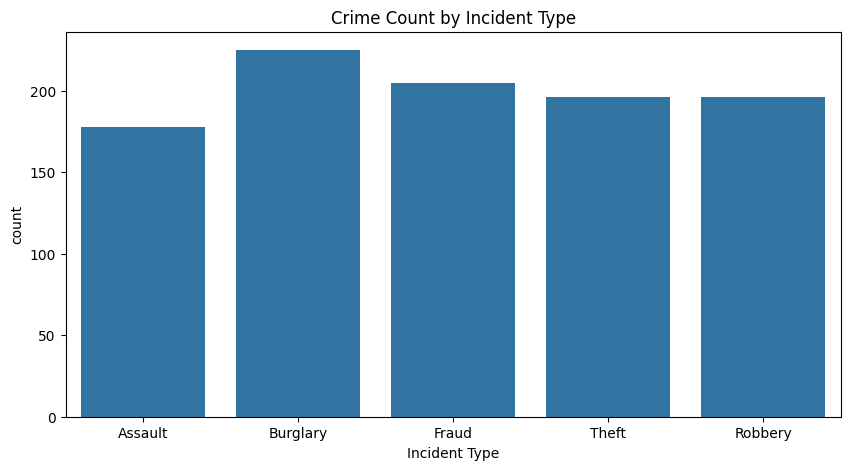

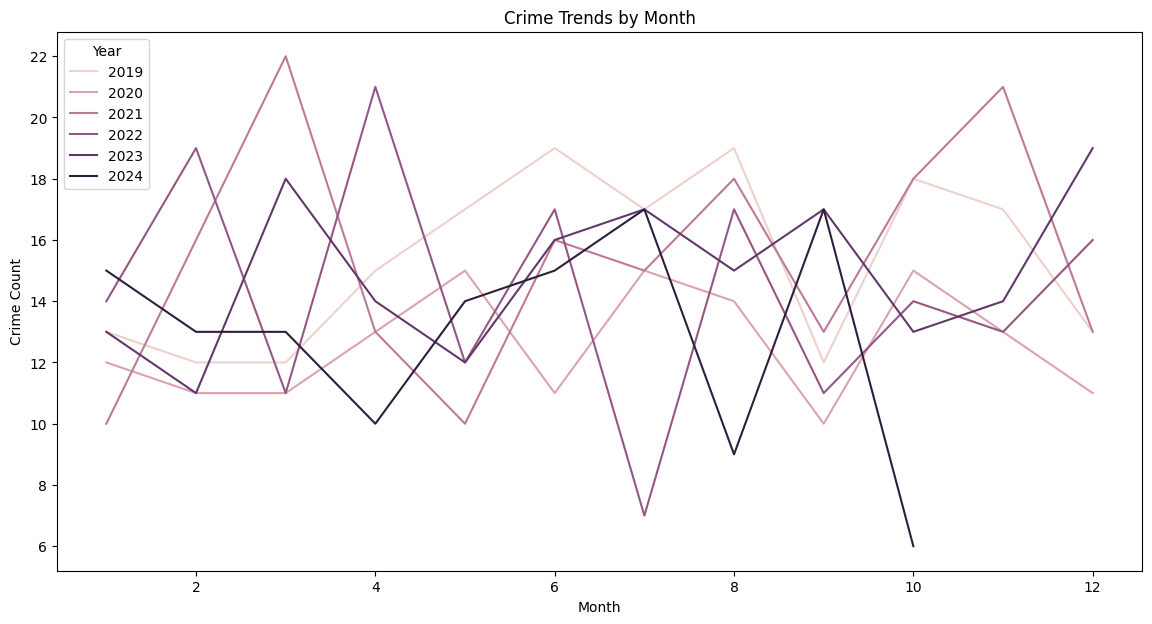

In [15]:
# Ensure the Timestamp is in datetime format
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Basic statistics
print(df.describe())

# Crime count by Location
plt.figure(figsize=(12, 6))
sns.countplot(y='Location', data=df, order=df['Location'].value_counts().index)
plt.title('Crime Count by Location')
plt.show()

# Distribution of crime types (Incident Type)
plt.figure(figsize=(10, 5))
sns.countplot(x='Incident Type', data=df)
plt.title('Crime Count by Incident Type')
plt.show()

# Crime trends over time
plt.figure(figsize=(14, 7))
df['Year'] = df['Timestamp'].dt.year
df['Month'] = df['Timestamp'].dt.month
monthly_crimes = df.groupby(['Year', 'Month']).size().reset_index(name='Crime Count')
sns.lineplot(x='Month', y='Crime Count', hue='Year', data=monthly_crimes)
plt.title('Crime Trends by Month')
plt.show()

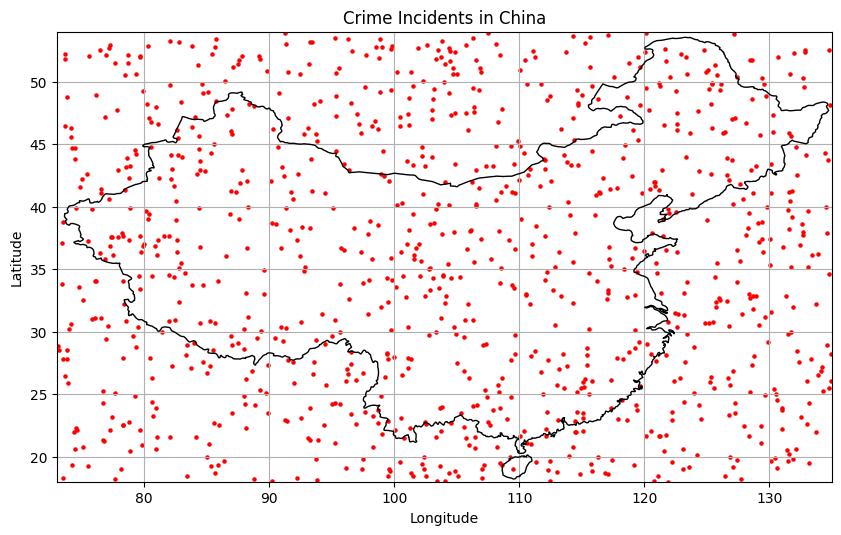

In [16]:
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium import plugins

# If you have lat/lon data, include them; for now, we'll create a GeoDataFrame with dummy lat/lon data
# Generate random Latitude and Longitude for visualization purposes
import random
df['Latitude'] = [random.uniform(18, 54) for _ in range(len(df))]  # Approximate latitudes for China
df['Longitude'] = [random.uniform(73, 135) for _ in range(len(df))]  # Approximate longitudes for China

# Create a GeoDataFrame
from shapely.geometry import Point
geometry = [Point(xy) for xy in zip(df['Longitude'], df['Latitude'])]
geo_df = gpd.GeoDataFrame(df, geometry=geometry)

# Load the shapefile of the world map (Ensure to provide a correct shapefile path if using one)
# In this case, we assume you're focusing on crime visualization across China
shapefile_path = r"D:\\ne_50m_admin_0_countries.shp"
world = gpd.read_file(shapefile_path)

# Filter to get only China
china = world[world['ADMIN'] == 'China']

# Create the plot for crime incidents
fig, ax = plt.subplots(figsize=(10, 10))
china.boundary.plot(ax=ax, linewidth=1, color='black')  # Plot China boundaries
geo_df.plot(ax=ax, color='red', markersize=5)           # Plot crime incidents (random points in this case)

# Set titles and labels
plt.title('Crime Incidents in China')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.xlim(73, 135)  # Approximate longitude bounds of China
plt.ylim(18, 54)   # Approximate latitude bounds of China
plt.grid()
plt.show()

# Create a map using Folium
m = folium.Map(location=[35.0, 105.0], zoom_start=5)  # Center the map on China

# Define color mapping for different crime types (Incident Type in your dataset)
crime_colors = {
    'Theft': 'blue',
    'Assault': 'red',
    'Burglary': 'green',
    'Fraud': 'purple',
    'Robbery': 'orange',
}

# Calculate the total number of incidents
total_incidents = len(df)

# Calculate the crime rates by Incident Type
crime_rate = df['Incident Type'].value_counts(normalize=True) * 100  # in percentage

# Add markers for each crime incident
for index, row in df.iterrows():
    crime_type = row['Incident Type']
    crime_rate_value = crime_rate[crime_type] if crime_type in crime_rate else 0.0  # Default to 0 if not found
    color = crime_colors.get(crime_type, 'gray')  # Default to gray if crime type not found

    # Create a marker with a popup
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"Crime Type: {crime_type}<br>Crime Rate: {crime_rate_value:.2f}%",
        icon=folium.Icon(color=color)
    ).add_to(m)

# Save the map to an HTML file
m.save('crime_locations_map_with_rates.html')

# To display the map in Jupyter Notebook:
m  # If you're using a Jupyter notebook to view the map


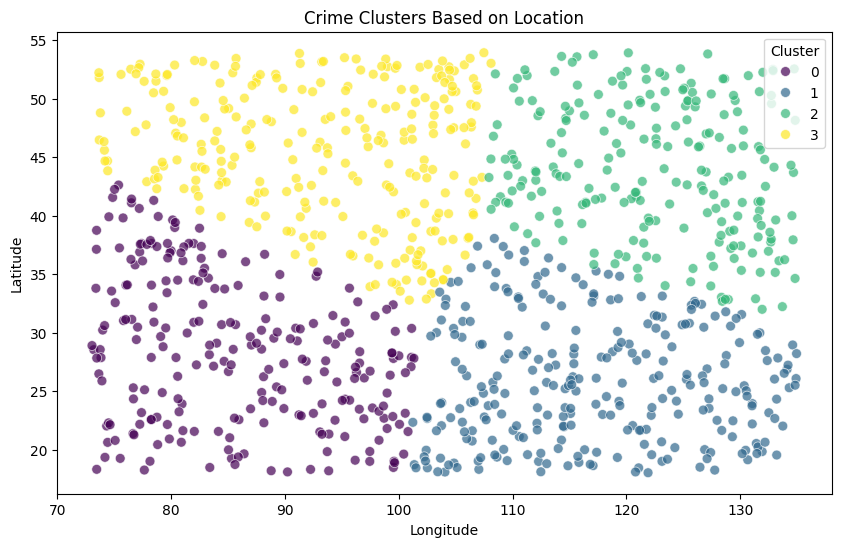

In [17]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming that Latitude and Longitude have already been generated or exist in your dataset
location_data = df[['Latitude', 'Longitude']].values

# K-Means clustering based on location
kmeans = KMeans(n_clusters=4, random_state=0).fit(location_data)
df['Cluster'] = kmeans.labels_

# Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Longitude'], y=df['Latitude'], hue=df['Cluster'], palette='viridis', s=50, alpha=0.7)
plt.title('Crime Clusters Based on Location')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Cluster')
plt.show()

Basic Statistics:
count    1000.0
mean        1.0
std         0.0
min         1.0
25%         1.0
50%         1.0
75%         1.0
max         1.0
dtype: float64


c:\Users\Pandu\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Pandu\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Pandu\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Pandu\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is ava

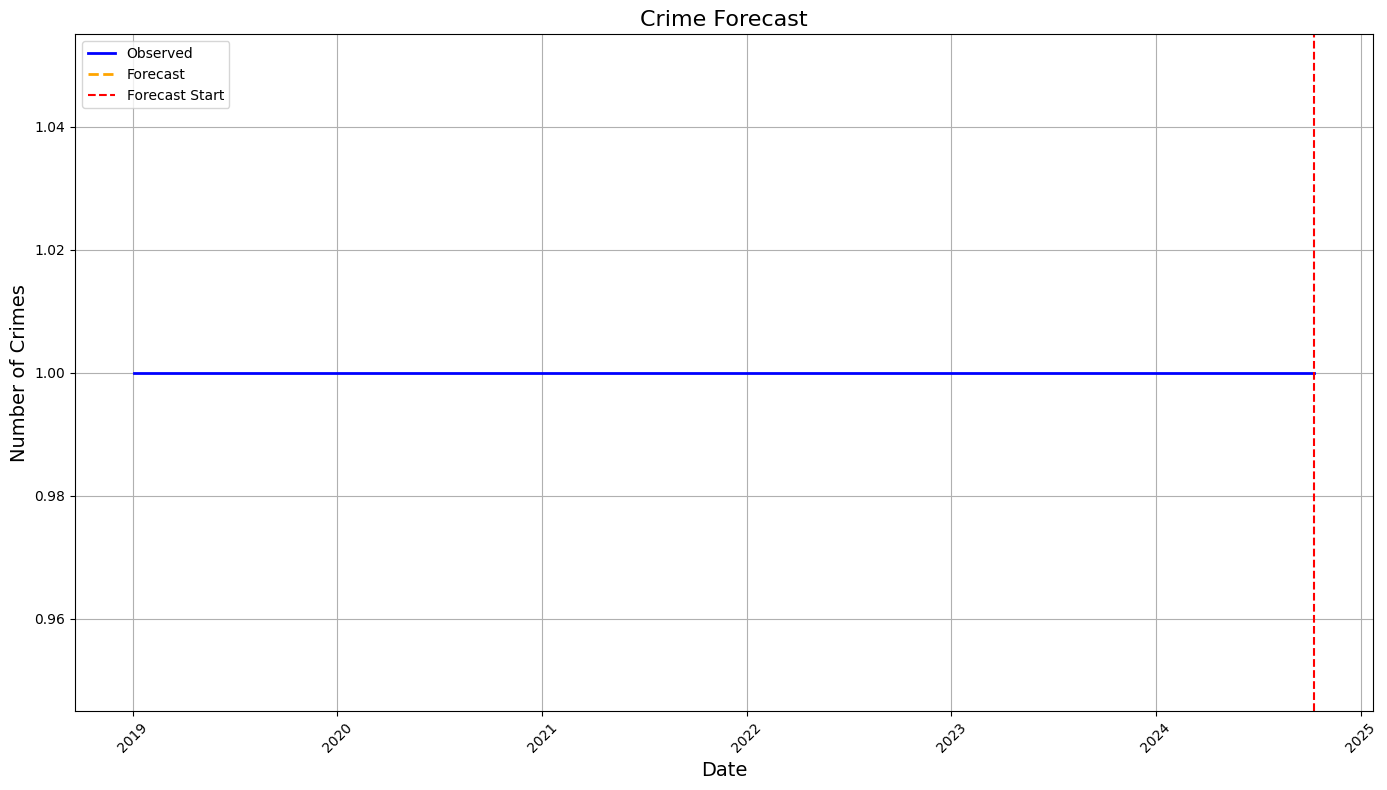

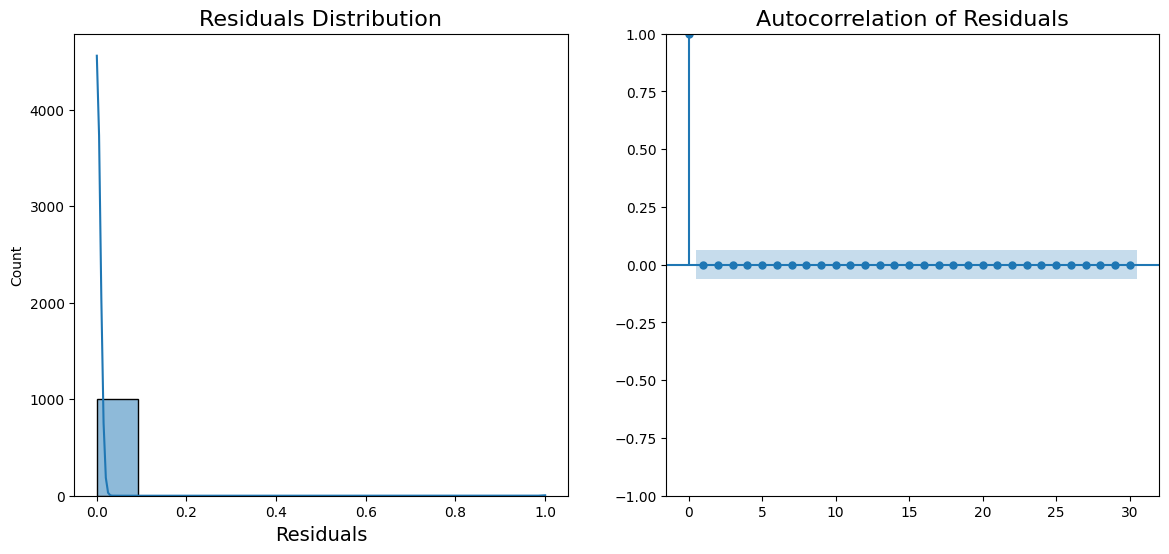

c:\Users\Pandu\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\regression\linear_model.py:1491: ValueWarning: Matrix is singular. Using pinv.
  warnings.warn("Matrix is singular. Using pinv.", ValueWarning)


<Figure size 1200x600 with 0 Axes>

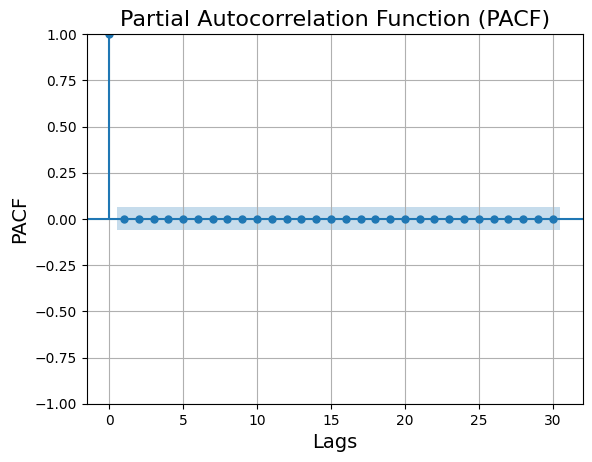

In [19]:
# Ensure the 'Date' column is a datetime type
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Create a date-wise count of crimes, grouping by Date
date_wise_crimes = df.groupby('Timestamp').size()

# Ensure the index of date_wise_crimes is a DatetimeIndex
date_wise_crimes.index = pd.to_datetime(date_wise_crimes.index)

# Display basic statistics of the crime data
print("Basic Statistics:")
print(date_wise_crimes.describe())

# Build and fit ARIMA model
model = ARIMA(date_wise_crimes, order=(5, 1, 0))  # Adjust (p,d,q) parameters if needed
model_fit = model.fit()

# Forecast future crime trends (next 30 days)
forecast = model_fit.forecast(steps=30)

# Create a date range for the forecasted period
forecast_dates = pd.date_range(start=date_wise_crimes.index[-1] + pd.Timedelta(days=1), periods=30)

# Convert forecast to a Pandas Series with the new index
forecast_series = pd.Series(forecast, index=forecast_dates)

# Plotting observed data and forecast
plt.figure(figsize=(14, 8))
plt.plot(date_wise_crimes, label='Observed', color='blue', linewidth=2)
plt.plot(forecast_series, label='Forecast', color='orange', linestyle='--', linewidth=2)
plt.title('Crime Forecast', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Crimes', fontsize=14)
plt.axvline(x=date_wise_crimes.index[-1], color='red', linestyle='--', label='Forecast Start', linewidth=1.5)
plt.legend()
plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Residual Analysis
residuals = model_fit.resid

# Plot Residuals
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution', fontsize=16)
plt.xlabel('Residuals', fontsize=14)

plt.subplot(1, 2, 2)
plot_acf(residuals, lags=30, ax=plt.gca())
plt.title('Autocorrelation of Residuals', fontsize=16)
plt.show()

# Plotting PACF for original data
plt.figure(figsize=(12, 6))
plot_pacf(date_wise_crimes, lags=30)
plt.title('Partial Autocorrelation Function (PACF)', fontsize=16)
plt.xlabel('Lags', fontsize=14)
plt.ylabel('PACF', fontsize=14)
plt.grid()
plt.show()

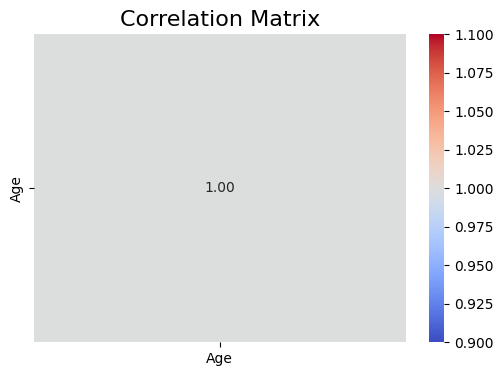

In [21]:
corr = df[['Age']].corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix', fontsize=16)
plt.show()

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Prepare data for classification
# Use 'Age' and create dummy variables for categorical data if necessary
X = df[['Age', 'Location', 'Crime Scene Location']]  # Using Age and categorical variables
X = pd.get_dummies(X, drop_first=True)  # Convert categorical variables to dummy/indicator variables
y = df['Weapon Used']  # Target variable

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train RandomForest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.19333333333333333
              precision    recall  f1-score   support

         Bat       0.23      0.26      0.24        66
         Gun       0.19      0.19      0.19        68
       Knife       0.19      0.19      0.19        43
        None       0.17      0.17      0.17        58
     Unknown       0.18      0.15      0.17        65

    accuracy                           0.19       300
   macro avg       0.19      0.19      0.19       300
weighted avg       0.19      0.19      0.19       300

